
# Laboratorio: Red Neuronal con MNIST  
**Curso:** Machine Learning  
**Total puntos:** 10

**Objetivo:** Implementar una red neuronal simple para clasificar dígitos escritos a mano del conjunto de datos MNIST utilizando Python y Keras.



## Paso 1: Cargar el conjunto de datos MNIST (1 punto)

Ejecuta el siguiente bloque para descargar y explorar el conjunto de datos.


In [13]:

from tensorflow.keras.datasets import mnist

# Cargar datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Tamaño del set de entrenamiento:", x_train.shape)
print("Tamaño del set de test:", x_test.shape)


Tamaño del set de entrenamiento: (60000, 28, 28)
Tamaño del set de test: (10000, 28, 28)



## Paso 2: Visualizar ejemplos del dataset (1 punto)

✏️ **Slot para completar:** Visualiza al menos 5 imágenes con sus etiquetas utilizando `matplotlib.pyplot.imshow()`.


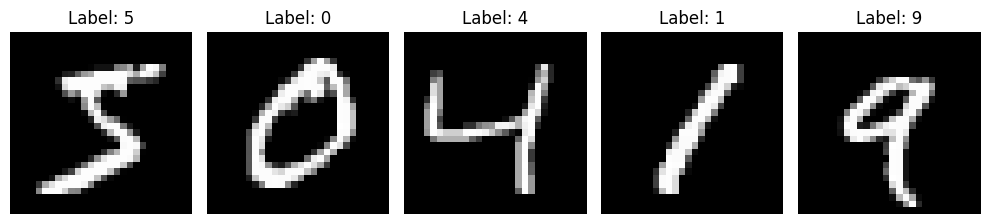

In [14]:

# COMPLETA AQUÍ: Visualización de imágenes con sus etiquetas
import matplotlib.pyplot as plt

# Visualizar 5 imágenes
plt.figure(figsize=(10, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()



## Paso 3: Preprocesamiento (1 punto)

✏️ **Slot para completar:** 
- Normaliza las imágenes (divide por 255.0).
- Aplana cada imagen a un vector de 784 valores.
- Codifica las etiquetas con `to_categorical`.


In [15]:

# COMPLETA AQUÍ: Normalización, flattening y codificación one-hot
from tensorflow.keras.utils import to_categorical

# - Normaliza las imágenes (divide por 255.0).
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# - Aplana cada imagen a un vector de 784 valores.
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

# - Codifica las etiquetas con `to_categorical`.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Verificación de las nuevas formas
print("Nuevo tamaño de x_train:", x_train.shape)
print("Nuevo tamaño de x_test:", x_test.shape)
print("Nuevo tamaño de y_train:", y_train.shape)
print("Nuevo tamaño de y_test:", y_test.shape)

Nuevo tamaño de x_train: (60000, 784)
Nuevo tamaño de x_test: (10000, 784)
Nuevo tamaño de y_train: (60000, 10)
Nuevo tamaño de y_test: (10000, 10)



## Paso 4: Definir la red neuronal (2 puntos)

✏️ **Slot para completar:** 
- Crea un modelo `Sequential`.
- Agrega una capa oculta con activación ReLU.
- Agrega una capa de salida con activación Softmax.
- Compila el modelo con `adam` y `categorical_crossentropy`.


In [16]:

# COMPLETA AQUÍ: Definición y compilación del modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Crear modelo Sequential
model = Sequential()

# Agregar capa oculta con activación ReLU
model.add(Dense(512, activation='relu', input_shape=(784,)))

# Agregar capa de salida con activación Softmax
model.add(Dense(10, activation='softmax'))

# Compilar el modelo con adam y categorical_crossentropy
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Mostrar resumen del modelo
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)


## Paso 5: Entrenar el modelo (1 punto)

✏️ **Slot para completar:** Entrena el modelo con `fit` durante 5 épocas y batch size 32.


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9936 - loss: 0.0205 - val_accuracy: 0.9795 - val_loss: 0.0711
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9957 - loss: 0.0137 - val_accuracy: 0.9771 - val_loss: 0.0879
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9945 - loss: 0.0171 - val_accuracy: 0.9753 - val_loss: 0.1043
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9967 - loss: 0.0103 - val_accuracy: 0.9804 - val_loss: 0.0844
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9964 - loss: 0.0105 - val_accuracy: 0.9819 - val_loss: 0.0820


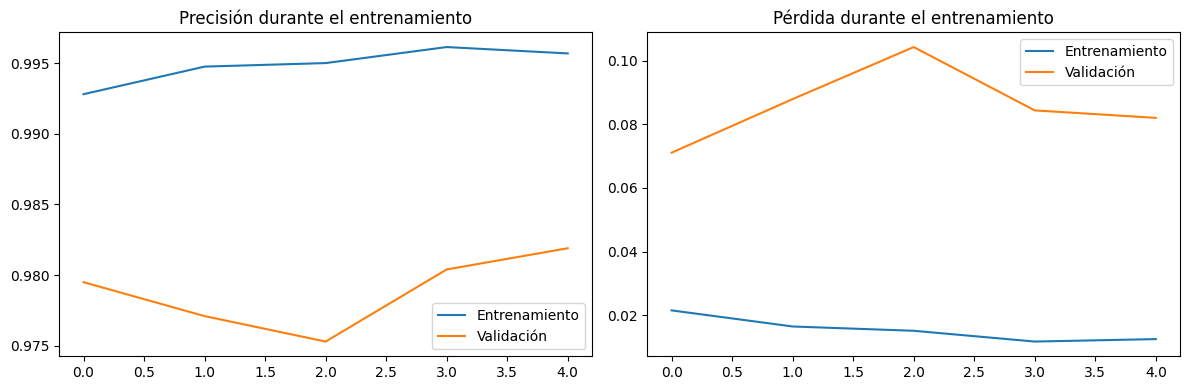

In [24]:
# Paso 5: Entrenar el modelo (1 punto)

# - Asegurar que las dimensiones son correctas
if len(y_train.shape) > 2:
    y_train = y_train.reshape(y_train.shape[0], -1)[:, :10]
if len(y_test.shape) > 2:
    y_test = y_test.reshape(y_test.shape[0], -1)[:, :10]


# -Entrenar con un batch_size 32 y epochs 5
try:
    history = model.fit(
        x_train, y_train,
        batch_size=32,
        epochs=5,
        validation_data=(x_test, y_test),
        verbose=1
    )
except ValueError as e:
    print("Error durante el entrenamiento:", e)

# -Visualización de resultados
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.legend()

plt.tight_layout()
plt.show()


## Paso 6: Evaluar el modelo (1 punto)

✏️ **Slot para completar:** Evalúa el modelo con `evaluate()` en el conjunto de prueba.



Resultados de la evaluación:
Precisión en el conjunto de prueba: 0.9819
Pérdida en el conjunto de prueba: 0.0820
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


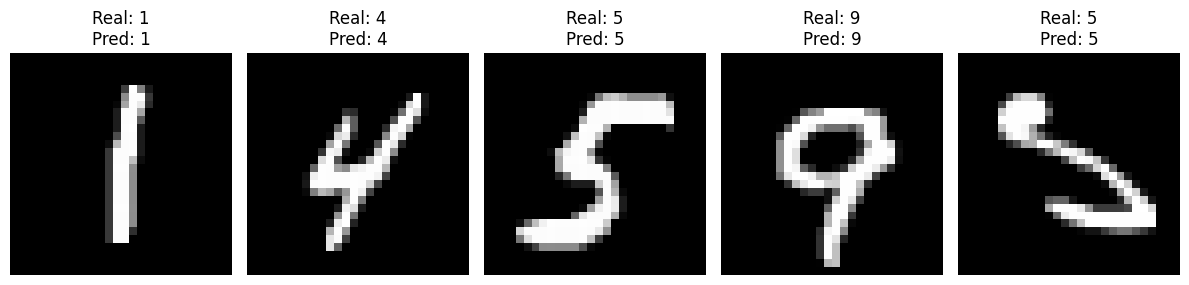

In [30]:

# COMPLETA AQUÍ: Evaluación del modelo
import numpy as np

# Evaluación del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print("\nResultados de la evaluación:")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Pérdida en el conjunto de prueba: {test_loss:.4f}")


# Seleccionar 5 muestras aleatorias del conjunto de prueba
sample_indices = np.random.choice(len(x_test), 5)
samples = x_test[sample_indices]
true_labels = np.argmax(y_test[sample_indices], axis=1)

# Hacer predicciones
predictions = model.predict(samples)
predicted_labels = np.argmax(predictions, axis=1)

# Visualizar resultados
plt.figure(figsize=(12, 3))
for i, (sample, true_label, pred_label) in enumerate(zip(samples, true_labels, predicted_labels)):
    plt.subplot(1, 5, i+1)
    plt.imshow(sample.reshape(28, 28), cmap='gray')
    plt.title(f"Real: {true_label}\nPred: {pred_label}")
    plt.axis('off')
    
    # Marcar en rojo las predicciones incorrectas
    if true_label != pred_label:
        plt.gca().set_frame_on(True)
        plt.gca().patch.set_edgecolor('red')
        plt.gca().patch.set_linewidth(3)
        
plt.tight_layout()
plt.show()

## Preguntas de Reflexión (3 puntos en total)

### 1. ¿Qué ventaja observas al usar codificación one-hot para las etiquetas? (0.5 punto)

Una de las ventajas de la codificación one-hot es que evita que el modelo interprete las etiquetas (como los dígitos del 0 al 9) como valores numéricos con orden o peso. Al convertirlas en vectores binarios (como el 3 que pasa a ser [0,0,0,1,0,...,0]), le decimos a la red que son categorías independientes.

### 2. ¿Qué ocurre si aumentas o disminuyes el número de neuronas ocultas? (0.5 punto)

Si le metemos más neuronas a la capa oculta, el modelo gana flexibilidad para aprender patrones complejos, pero puede terminar memorizando los datos de entrenamiento y con menos neuronas, quizá no capture bien las características y falle en generalizar.

### 3. ¿Qué alternativa propondrías al optimizador `adam` y por qué? (0.5 punto)

Yo propondria probar SGD con momentum, ya que es más controlable, no ajusta automáticamente la tasa de aprendizaje como Adam, pero con un buen momentum ( 0.9) puede esquivar mínimos locales y converger mejor en problemas específicos.Adam es como mas automatico a diferencia de SGD.

### 4. ¿Cómo cambia el desempeño si entrenas más épocas? ¿Cuál es el riesgo? (0.5 punto)

El rendimiento es mejor si son los mismos datos siempre pero en datos nuevos empieza a empeorar ya que el modelo memoriza con los datos con los que se entrenó y al presentarse casos nuevos podria fallar.

### 5. ¿Por qué es importante dividir en conjuntos de entrenamiento y prueba? (1 punto)

La división entre conjuntos de entrenamiento y prueba es importante porque nos permite evaluar la capacidad de generalización del modelo. El conjunto de entrenamiento se utiliza para que el modelo aprenda los patrones de los datos y el conjunto de prueba sirve como una validación independiente que simula cómo se comportaría con información que el modelo no conoce.